In [9]:
import pandas as pd
df = pd.read_csv('./mortgage rates-1975-01-01-ed-2023-06-21-bankofcanad.csv')

In [10]:
df.head(20)

,date,Conventional mortgage - 1-year,Conventional mortgage - 5-year,Conventional mortgage - 3-year,Prime rate
0,1975-01-01,NaN,12.00,NaN,11.0
1,1975-01-08,NaN,12.00,NaN,11.0
2,1975-01-15,NaN,12.00,NaN,10.5
3,1975-01-22,NaN,12.00,NaN,10.5
4,1975-01-29,NaN,12.00,NaN,10.5
5,1975-02-05,NaN,11.50,NaN,9.5
6,1975-02-12,NaN,10.75,NaN,9.5
7,1975-02-19,NaN,10.75,NaN,9.5
8,1975-02-26,NaN,10.75,NaN,9.5
9,1975-03-05,NaN,10.75,NaN,9.0


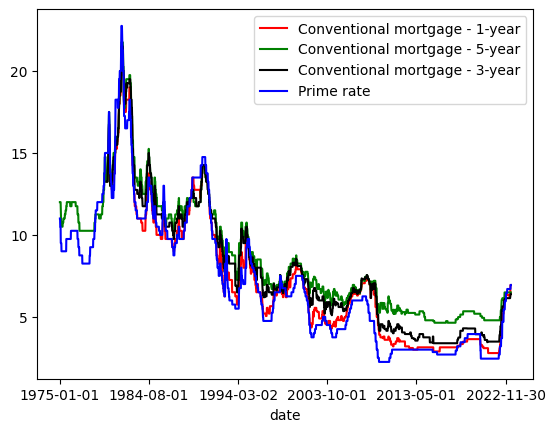

In [11]:
import matplotlib.pyplot as plt

from matplotlib.dates import YearLocator, DateFormatter

ax = plt.gca()
df.plot(kind='line',x='date',y='Conventional mortgage - 1-year',color='red',ax=ax)
df.plot(kind='line',x='date',y='Conventional mortgage - 5-year', color='green', ax=ax)
df.plot(kind='line',x='date',y='Conventional mortgage - 3-year', color='black', ax=ax)
df.plot(kind='line',x='date',y='Prime rate', color='blue', ax=ax)
plt.show()


Above analyze indicating there are no data for all the Mortgage types at the beginning of the data set. lets figure out last index that have anull values for this scenario

In [12]:
index = max(df[df['Conventional mortgage - 1-year'].isnull()].index.tolist())
print(index)

260


So its 261 rows .since its 0 indexing. lets filter the data set from row 262 and onwards to use

In [13]:
df=df.iloc[262:]
df.reset_index(drop=True, inplace=True)

In [14]:
df.head(20)

,date,Conventional mortgage - 1-year,Conventional mortgage - 5-year,Conventional mortgage - 3-year,Prime rate
0,1980-01-09,13.25,13.25,13.25,15.00
1,1980-01-16,13.25,13.25,13.25,15.00
2,1980-01-23,13.25,13.25,13.25,15.00
3,1980-01-30,13.25,13.25,13.25,15.00
4,1980-02-06,13.25,13.25,13.25,15.00
5,1980-02-13,13.25,13.25,13.25,15.00
6,1980-02-20,13.75,13.75,13.75,15.00
7,1980-02-27,14.50,14.50,14.50,15.00
8,1980-03-05,14.50,14.50,14.50,15.00
9,1980-03-12,14.50,14.50,14.50,15.00


In [15]:
# changing the dimentions , mortagege types will be rows instead of columns
df=df.melt(id_vars = ['date'], var_name ='Mortgage_type', value_name='Rate')
df.head(20)

,date,Mortgage_type,Rate
0,1980-01-09,Conventional mortgage - 1-year,13.25
1,1980-01-16,Conventional mortgage - 1-year,13.25
2,1980-01-23,Conventional mortgage - 1-year,13.25
3,1980-01-30,Conventional mortgage - 1-year,13.25
4,1980-02-06,Conventional mortgage - 1-year,13.25
5,1980-02-13,Conventional mortgage - 1-year,13.25
6,1980-02-20,Conventional mortgage - 1-year,13.75
7,1980-02-27,Conventional mortgage - 1-year,14.50
8,1980-03-05,Conventional mortgage - 1-year,14.50
9,1980-03-12,Conventional mortgage - 1-year,14.50


In [16]:
import pyodbc

cnxn = pyodbc.connect(
    r'Driver=SQL Server;'
    r'Server=xxxxx;'
    r'Database=Housing;'
    r'Trusted_Connection=yes;')

cursor = cnxn.cursor()

type = list(df['Mortgage_type'].unique())

sql = "INSERT INTO MORTGAGERATETYPES (Name) VALUES (?)"
try:
    cursor.executemany(sql,zip(type))
    cursor.commit()
except:
    pass    


for row in df.itertuples():
    # get the Mortgage rate type ids for realted column
    cursor.execute('select RateTypeID from MortgageRateTypes where Name = ?',row[2])
    type = cursor.fetchone()[0]
    
    sql = "INSERT INTO MortgageRates (Date,RateType,Rate) VALUES(?,?,?)"
    
    cursor.execute(sql,row[1],type,row[3])
    cursor.commit()
    

cursor.close()